In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'2.1.4'

In [3]:
df = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


'0.12.10b0'

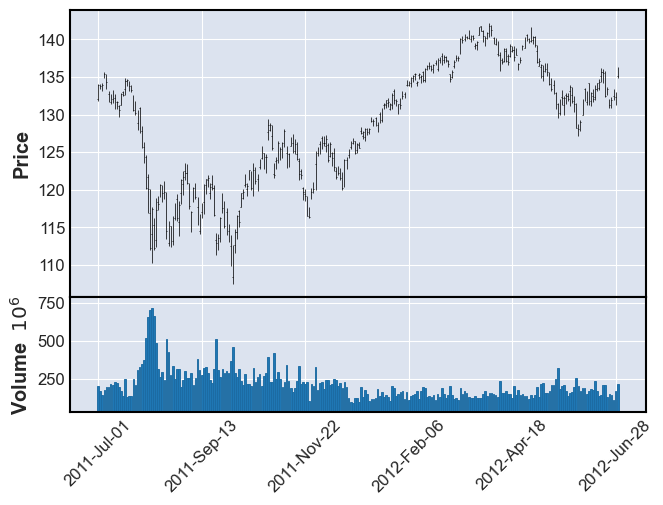

In [4]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True)

In [7]:
def percentB_belowzero(percentB,price):
    import numpy as np
    signal   = []
    previous = -1.0
    for date,value in percentB.items():
        if value < 0 and previous >= 0:
            signal.append(price[date]*0.99)
        else:
            signal.append(np.nan)
        previous = value
    return signal

In [8]:
tdf = df.loc['05-10-2012':'06-07-2012',]  # Take a smaller data set so it's easier to see the scatter points

signal = percentB_belowzero(tdf['PercentB'], tdf['Close'])

In [10]:
signal

[nan,
 nan,
 132.76890099000002,
 nan,
 nan,
 129.55140099000002,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 126.87840395999999,
 nan,
 nan,
 nan,
 nan]

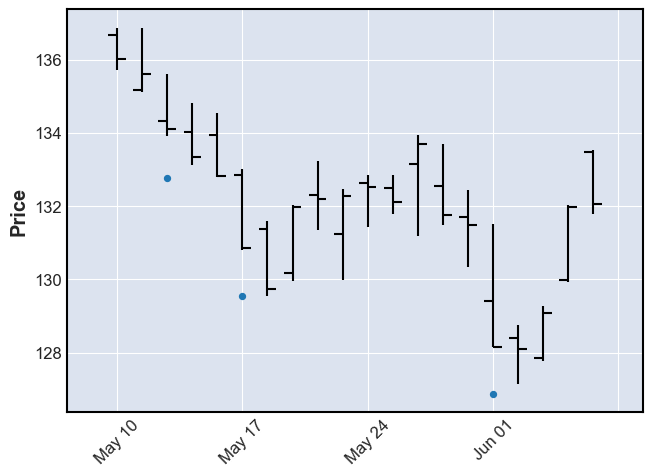

In [9]:
apd = mpf.make_addplot(signal,type='scatter')

mpf.plot(tdf,addplot=apd)

In [3]:
import yfinance as yf

In [7]:
ticker = yf.Ticker("AAPL")
data = ticker.history(interval="1d", period="100d")
len(data)

100

In [8]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-07-01 00:00:00-04:00,211.611974,217.019756,211.442359,216.261475,60402900,0.0,0.0
1,2024-07-02 00:00:00-04:00,215.662820,219.883297,214.615199,219.773544,58046200,0.0,0.0
2,2024-07-03 00:00:00-04:00,219.504150,221.050659,218.536335,221.050659,37369800,0.0,0.0
3,2024-07-05 00:00:00-04:00,221.150418,225.939602,221.150418,225.829849,60412400,0.0,0.0
4,2024-07-08 00:00:00-04:00,226.578168,227.336465,222.746827,227.306534,59085900,0.0,0.0
